In [1]:
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
import torch
import os
import numpy as np
torch.manual_seed(0)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
transform = transforms.Compose([
    torchvision.transforms.Resize(size = (224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [5]:
image = Image.open('viral.png').convert('RGB')

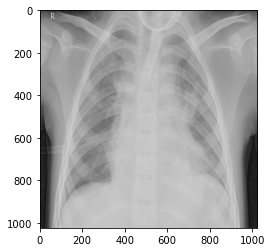

In [6]:
plt.imshow(image)

In [7]:
resnet18 = torchvision.models.resnet18(pretrained = True)
resnet18.fc = torch.nn.Linear(in_features = 512, out_features = 3)
loss_fn     = torch.nn.CrossEntropyLoss()
optimizer   = torch.optim.Adam(resnet18.parameters(), lr = 3e-5)

In [8]:
resnet18.load_state_dict(torch.load('model2-resnet18.pth'))
resnet18 = resnet18.to(device)

In [9]:
def show_preds(image):
    resnet18.eval()
    outputs  = resnet18(image)
    _, preds = torch.max(outputs, 1)
    return preds

In [10]:
image = torch.stack([transform(image)]).to(device)
print(show_preds(image))
if torch.cuda.is_available(): torch.cuda.empty_cache()

tensor([1], device='cuda:0')


/home/vjaiwantx/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448238472/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
